## Loading Keras

In [1]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
import numpy as np

Using TensorFlow backend.


In [2]:
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words = 10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

### Integer array to Sentence

In [5]:
word_index = reuters.get_word_index()
word_index_dict = dict([(value, key) for (key, value) in word_index.items()])
sentence = ' '.join([word_index_dict.get(i-3, '?') for i in train_data[12]])
sentence

'? ? corp said it reached an agreement in principal covering the acquisition of the company by privately held ? financial corp the agreement calls for ? to make a self tender offer for all of its outstanding stock at a price of 22 dlrs per share in cash ? headquartered in los angeles develops manages and ? real estate ? also said reuter 3'

### Integer array to one-hot-encoding

In [6]:
def to_sequence(sequence, dim = 10000):
    results = np.zeros((len(sequence), dim))
    for (i , sequence) in enumerate(sequence):
        results[i, sequence] = 1
    return results

In [7]:
x_train = to_sequence(train_data)
y_test = to_sequence(test_data)

In [8]:
x_train_label = to_categorical(train_labels)
y_test_label =  to_categorical(test_labels)

### Developing Model

In [9]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()
model.add(Dense(192, activation = 'relu', input_shape = (10000,)))
model.add(Dense(192, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(46, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 192)               1920192   
_________________________________________________________________
dense_2 (Dense)              (None, 192)               37056     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                12352     
_________________________________________________________________
dense_4 (Dense)              (None, 46)                2990      
Total params: 1,972,590
Trainable params: 1,972,590
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer = 'rmsprop', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_val = x_train[1000:]

y_val = x_train_label[:1000]
partial_y_val = x_train_label[1000:]

In [14]:
history = model.fit(partial_x_val, partial_y_val, epochs = 10, batch_size=512, validation_data = (x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 7s 902us/step - loss: 2.1490 - acc: 0.5403 - val_loss: 1.3527 - val_acc: 0.6830
Epoch 2/10
7982/7982 [==============================] - 5s 608us/step - loss: 1.1488 - acc: 0.7377 - val_loss: 1.1236 - val_acc: 0.7310
Epoch 3/10
7982/7982 [==============================] - 4s 486us/step - loss: 0.8071 - acc: 0.8183 - val_loss: 0.9734 - val_acc: 0.7920
Epoch 4/10
7982/7982 [==============================] - 4s 480us/step - loss: 0.5811 - acc: 0.8664 - val_loss: 0.9390 - val_acc: 0.8020
Epoch 5/10
7982/7982 [==============================] - 4s 485us/step - loss: 0.4044 - acc: 0.9128 - val_loss: 0.9367 - val_acc: 0.8050
Epoch 6/10
7982/7982 [==============================] - 5s 671us/step - loss: 0.3403 - acc: 0.9236 - val_loss: 0.9258 - val_acc: 0.8140
Epoch 7/10
7982/7982 [==============================] - 5s 586us/step - loss: 0.2356 - a

### Plotting Loss between Training loss and Validation loss

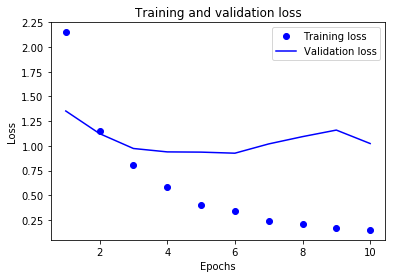

In [21]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting Accuracy between Training acc and Validation acc

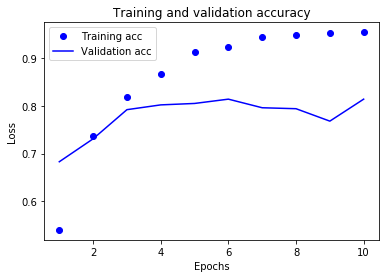

In [16]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Evaluating the model

In [22]:
results = model.evaluate(y_test, y_test_label )

2246/2246 [==============================] - 1s 412us/step


In [23]:
results

[1.1338875268255082, 0.7840605521456854]

### Predicting the model

In [24]:
predictions = model.predict(y_test)

In [29]:
predictions[15]

array([7.0959162e-11, 4.1217096e-08, 5.4400728e-09, 1.8423375e-04,
       5.2215910e-08, 3.9515555e-09, 2.3402683e-13, 2.6193993e-11,
       3.7312847e-07, 4.4510813e-09, 5.6803529e-12, 9.9980634e-01,
       4.2115815e-08, 2.3198925e-12, 5.6284592e-11, 1.4190493e-09,
       6.0724523e-09, 1.7228602e-12, 4.7799193e-07, 6.0962657e-09,
       2.5233584e-07, 9.7911457e-10, 8.7622789e-09, 1.4720619e-08,
       1.7074914e-08, 1.8431016e-10, 7.5734826e-12, 1.4478954e-10,
       2.5457891e-09, 1.4368650e-08, 4.8921938e-09, 4.0826354e-08,
       4.5310259e-07, 8.5546809e-13, 1.2235269e-07, 5.2756038e-10,
       7.6016099e-06, 3.1470332e-08, 1.0454152e-10, 2.2448315e-12,
       4.4259268e-10, 1.8033249e-09, 7.2499164e-12, 1.1939091e-09,
       1.7055652e-11, 1.9080884e-11], dtype=float32)

In [30]:
np.argmax(predictions[15])

11